# Actividad 1
-----------------------

Alumno: Gonzalo Antonio Delgado Rubio
Curso: 06MBID_04_B_2024-25_Estadística avanzada
Seguro de viaje con el atributo objetivo de: Estado del reclamo (Sí o No)

Atributo Ingles	Atributo Español	Significado
Claim	Estado del reclamo	Claim Status
Agency	Nombre de la agencia	Agency Name
Agency Type	Tipo de agencias de seguros	Type of Insurance Agency
Distribution Channel	Canal de distribución	Distribution Channel of Insurance Agency
Product Name	Nombre de los productos	Name of the Insurance Product
Duration	Duración del viaje	Duration of the Trip
Destination	Destino del viaje	Destination of the Trip
Net Sales	Monto de ventas	Net Sales of Insurance Policies
Commision (in value)	Comisión recibida	Commission Received by Insurance Agency
Gender	Género del asegurado	Gender of the Insured
Age	Edad del asegurado	Age of the Insured

In [2]:
# Instalar y cargar las librerías necesarias
install.packages("caret")
install.packages("dplyr")
# install.packages("smotefamily")
install.packages("ggplot2")
library(caret)
library(dplyr)
# library(smotefamily)
library(ggplot2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# carga de dataset
df <- read.csv("dataset.csv")

## Analisis Exploratorio

In [4]:
# Renombrar las columnas utilizando la función rename de dplyr

df <- df %>% rename(
  id = ID,
  age = Age,
  agency = Agency,
  agency_type = `Agency.Type`,
  commision = `Commision..in.value.`,
  destination = Destination,
  distribution_channel = `Distribution.Channel`,
  duration = Duration,
  gender = Gender,
  net_sales = `Net.Sales`,
  product_name = `Product.Name`,
  claim = Claim
)

# Mostrar las primeras 2 filas del DataFrame
head(df, 2)

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
2,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0


In [5]:
# Instalar y cargar el paquete psych
install.packages("psych")
library(psych)

# Obtener estadísticas descriptivas de todas las columnas
describe(df)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,62288,3.284495e+04,1.806542e+04,33446.50,3.308708e+04,22892.826600,0,63323.00,63323.00,-0.09030053,-1.1633701,7.238454e+01
age,2,62288,3.966632e+01,1.401465e+01,36.00,3.769584e+01,7.413000,0,118.00,118.00,2.86558337,12.4269866,5.615393e-02
agency*,3,62288,7.200729e+00,2.674967e+00,8.00,7.164513e+00,1.482600,1,16.00,15.00,-0.07415869,0.3235035,1.071806e-02
agency_type*,4,62288,1.655279e+00,4.752811e-01,2.00,1.694092e+00,0.000000,1,2.00,1.00,-0.65340786,-1.5730834,1.904357e-03
commision,5,62288,1.282970e+01,2.349874e+01,1.88,7.235987e+00,2.787288,0,262.76,262.76,3.36748063,16.5153677,9.415480e-02
destination*,6,62288,6.090452e+01,2.849731e+01,73.00,6.311366e+01,23.721600,1,102.00,101.00,-0.60548286,-0.8625374,1.141831e-01
distribution_channel*,7,62288,1.982083e+00,1.326501e-01,2.00,2.000000e+00,0.000000,1,2.00,1.00,-7.26837803,50.8301352,5.315025e-04
duration,8,62288,6.095880e+01,1.143253e+02,25.00,3.532459e+01,26.686800,-2,4881.00,4883.00,14.86221447,555.5211229,4.580789e-01
gender*,9,62288,1.544920e+00,7.800916e-01,1.00,1.431169e+00,0.000000,1,3.00,2.00,0.98997324,-0.6451385,3.125672e-03


In [6]:
# observamos valores negativos para duration y net_sales, de la misma forma age tiene un valor maximo de 118 que podría resultar atipico
# 
# Aqui tambien se aprecia que habría una gran cantidad de valores nulos para gender

## 2.1 Nulidad de Datos

In [7]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos <- colSums(is.na(df)) / nrow(df) * 100

# Mostrar el porcentaje de nulos por columna
porcentaje_nulos

id                  age               agency 
                   0                    0                    0 
         agency_type            commision          destination 
                   0                    0                    0 
distribution_channel             duration               gender 
                   0                    0                    0 
           net_sales         product_name                claim 
                   0                    0                    0

In [8]:
# Instalar y cargar el paquete necesario
install.packages("dplyr")
library(dplyr)

# Eliminar la columna 'gender'
df <- df %>% select(-gender)

# Mostrar la primera fila del DataFrame
head(df, 1)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,id,age,agency,agency_type,commision,destination,distribution_channel,duration,net_sales,product_name,claim
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>,<chr>,<int>
1,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,112.5,Silver Plan,1


## 2.3 Quitar Datos Considerados Errores

In [9]:
# Instalar y cargar el paquete necesario
install.packages("dplyr")
library(dplyr)

# Cantidad de datos negativos para la columna 'net_sales'
cantidad_negativos_net_sales <- nrow(df %>% filter(net_sales < 0))
cat("Cantidad de datos negativos para net_sales:", cantidad_negativos_net_sales, "\n")

# Cantidad de datos negativos para la columna 'duration'
cantidad_negativos_duration <- nrow(df %>% filter(duration < 0))
cat("Cantidad de datos negativos para duration:", cantidad_negativos_duration, "\n")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Cantidad de datos negativos para net_sales: 584 
Cantidad de datos negativos para duration: 4 


In [10]:
# Instalar y cargar el paquete necesario
install.packages("dplyr")
library(dplyr)

# Eliminar filas con valores negativos en 'net_sales' y 'duration'
df <- df %>% filter(net_sales >= 0, duration >= 0)

# Mostrar la dimensión del DataFrame resultante
dim(df)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 61700    11

## 2.4 Verificar la existencia de duplicados

In [11]:
# Suponiendo que `df` es tu DataFrame en R
sum(duplicated(df))


[1] 11493

In [12]:
# Suponiendo que `df` es tu DataFrame en R
duplicate_columns <- df %>%
  filter(duplicated(.) | duplicated(., fromLast = TRUE)) %>%
  arrange(across(everything()))

In [13]:
# Suponiendo que `df` es tu DataFrame en R
df_clean <- df %>%
  distinct()

In [14]:
nrow(df_clean)

[1] 50207

# 3. Analisis Exploratorio De los Datos

En este apartado nos encargaremos de realizar el análisis a las variables categoricas y numericas asi como a nuestro target para visualizar temas de balance

## 3.1 Validando Distribución Clase Objetivo Claim

In [15]:
df_clean %>%
  group_by(claim) %>%
  summarise(count = n()) %>%
  mutate(proportion = round(count / sum(count), 4))

claim,count,proportion
<int>,<int>,<dbl>
0,49284,0.9816
1,923,0.0184


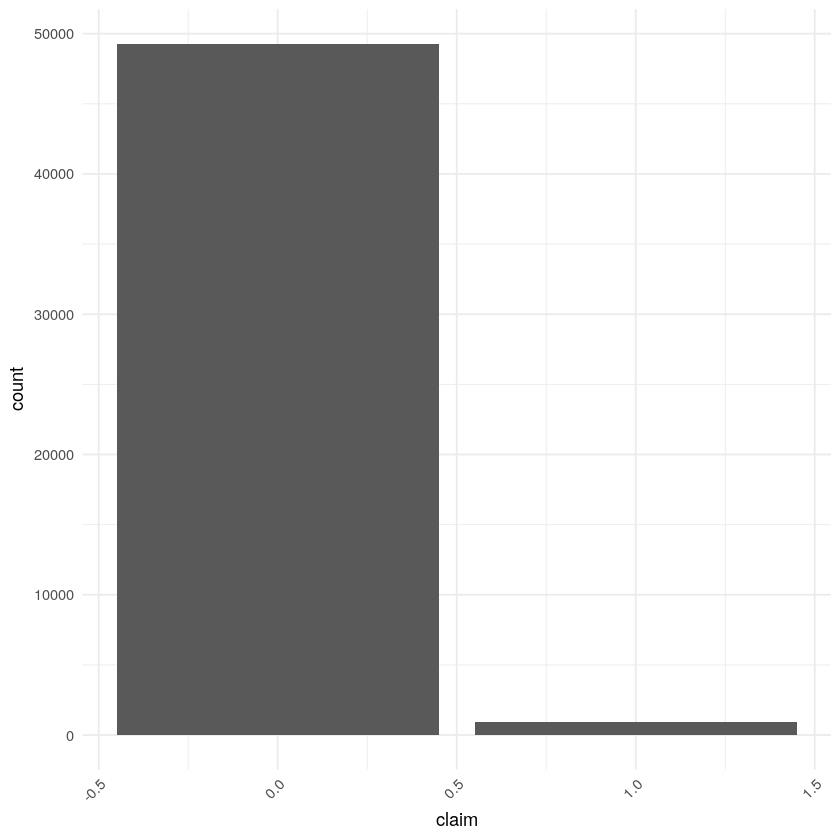

In [16]:
library(ggplot2)

# Suponiendo que `df_clean` es tu DataFrame en R
ggplot(df_clean, aes(x = claim)) +
  geom_bar() +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [17]:
table(df_clean$claim)


    0     1 
49284   923 

Las reclamaciones de seguros de viaje de la mayoría de los clientes fueron rechazadas por las agencias de seguros. Sólo se aceptó un número mínimo de reclamaciones de seguros. Esto sugiere que se trata de un conjunto de datos muy desequilibrado que debe equilibrarse más adelante para garantizar que no afecte negativamente al rendimiento de los algoritmos de aprendizaje automático.


In [18]:
head(df_clean,2)

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,net_sales,product_name,claim
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>,<chr>,<int>
1,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,112.5,Silver Plan,1
2,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,37.0,Basic Plan,0


## 3.2 Identificación de tipos de Variables

De acuerdo a la exploración del datset podemos distinguir a las variables numéricas y categóricas según las columnas

In [19]:
# Identificar variables numéricas
variables_numericas <- c('age', 'commision', 'duration', 'net_sales')

# Identificar variables categóricas -- 'gender' no se incluye dado que se descartó en el análisis
variables_categoricas <- c('agency', 'agency_type', 'destination', 'distribution_channel', 'product_name')

# Imprimir las listas
cat("Variables numéricas:", paste(variables_numericas, collapse = ", "), "\n")
cat("Variables categóricas:", paste(variables_categoricas, collapse = ", "), "\n")


Variables numéricas: age, commision, duration, net_sales 
Variables categóricas: agency, agency_type, destination, distribution_channel, product_name 


### 3.2.1 Exploración atributos numericos


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


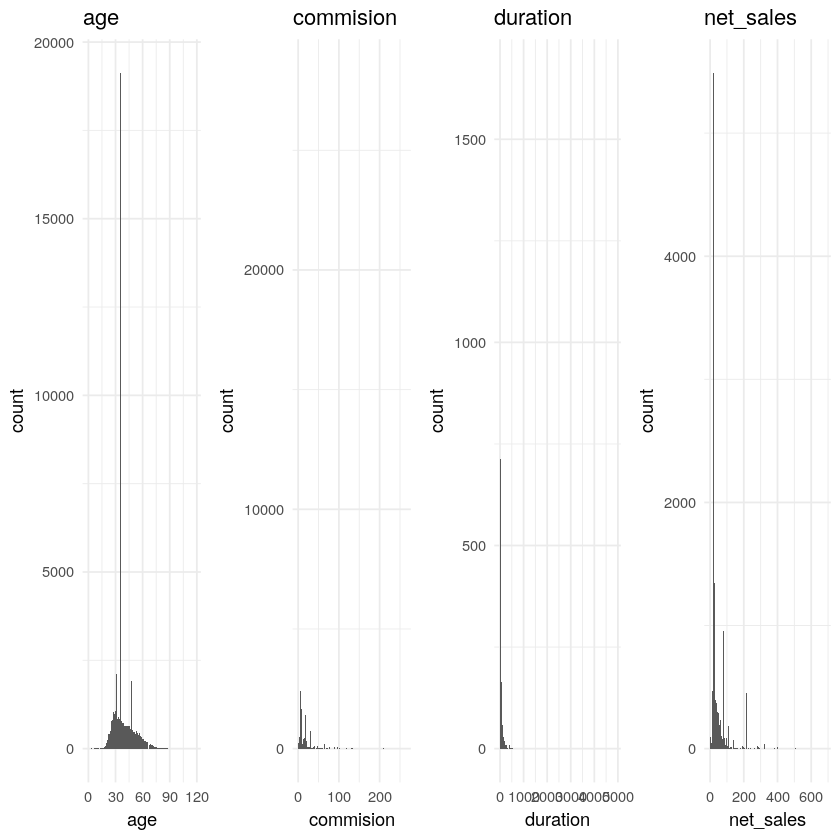

In [20]:
library(gridExtra)
# Suponiendo que `df_clean` es tu DataFrame en R
plots <- lapply(variables_numericas, function(column) {
  ggplot(df_clean, aes_string(x = column)) +
    geom_histogram(binwidth = 1) +
    ggtitle(column) +
    theme_minimal()
})

# Usar grid.arrange para mostrar múltiples gráficos
do.call(grid.arrange, c(plots, ncol = length(variables_numericas)))


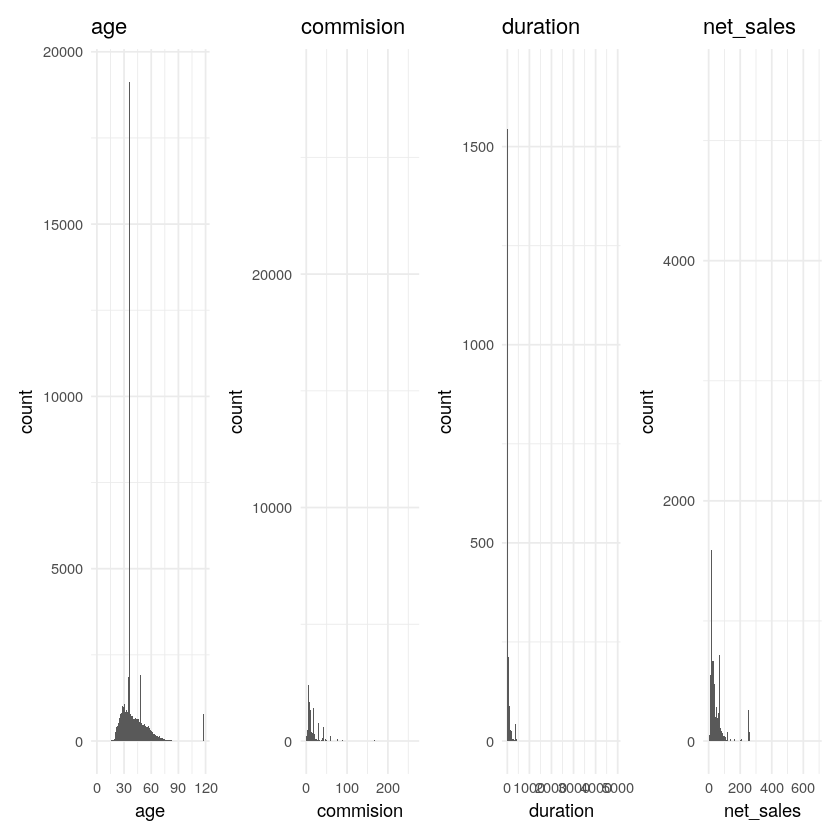

In [21]:

library(patchwork)

# Suponiendo que `df_clean` es tu DataFrame en R
plots <- lapply(variables_numericas, function(column) {
  ggplot(df_clean, aes_string(x = column)) +
    geom_histogram(binwidth = 1) +
    ggtitle(column) +
    theme_minimal()
})

# Combinando los gráficos
wrap_plots(plots, ncol = length(variables_numericas))


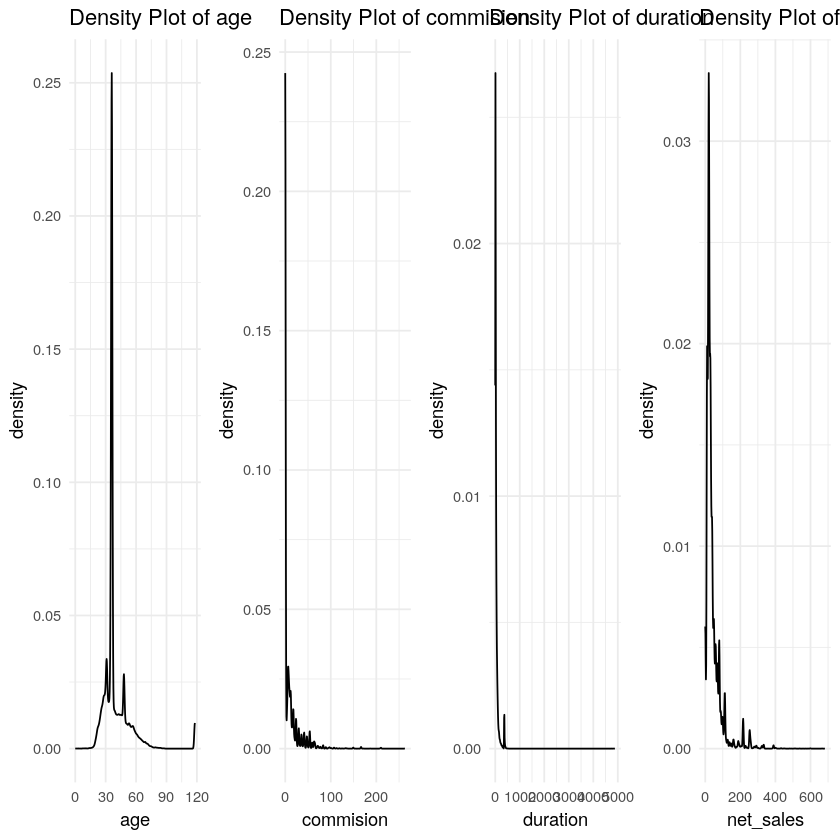

In [22]:
library(ggplot2)
library(gridExtra)

# Obteniendo graficos de densidad para atributos numericos
# genera grafico
plots <- lapply(variables_numericas, function(column) {
  ggplot(df_clean, aes_string(x = column)) +
    geom_density() +
    ggtitle(paste('Density Plot of', column)) +
    theme_minimal()
})

# Usar grid.arrange para mostrar múltiples gráficos
do.call(grid.arrange, c(plots, ncol = length(variables_numericas)))


Observamos que para todas nuestras variables la data no se encontraría correctamente distribuida por lo que se entendería que existen muchos valores atipicos.

La variable que tendría mejor distribución seria el de edad


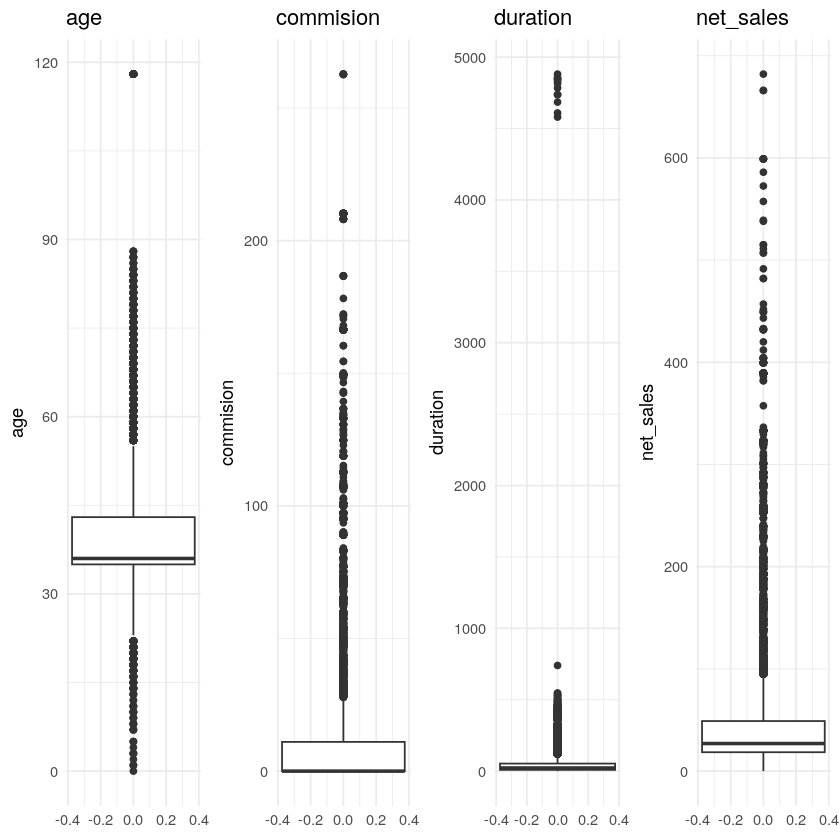

In [23]:
library(ggplot2)
library(gridExtra)

# Suponiendo que `df_clean` es tu DataFrame en R
plots <- lapply(variables_numericas, function(column) {
  ggplot(df_clean, aes_string(y = column)) +
    geom_boxplot() +
    ggtitle(column) +
    theme_minimal()
})

# Usar grid.arrange para mostrar múltiples gráficos
do.call(grid.arrange, c(plots, ncol = length(variables_numericas)))


observamos datos fueras de dominio para todos atributos numericos, estos serán tratados más adelante


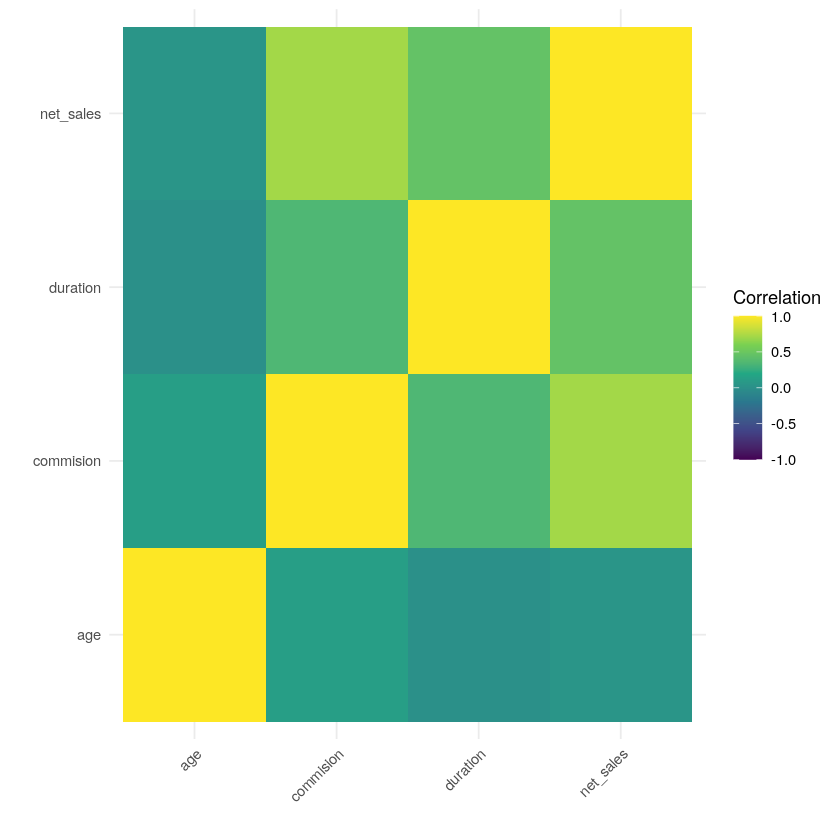

In [24]:
library(ggplot2)
library(reshape2)

# Suponiendo que `df_clean` es tu DataFrame en R
cor_matrix <- cor(df_clean[variables_numericas], use = "complete.obs")
melted_cor_matrix <- melt(cor_matrix)

# Crear el mapa de calor
ggplot(melted_cor_matrix, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_viridis_c(limits = c(-1, 1)) +
  theme_minimal() +
  labs(x = '', y = '', fill = 'Correlation') +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


observamos correlación positiva entre los datos de net_sales y commision

#### 3.2.2 Exploración atributos Categoricos

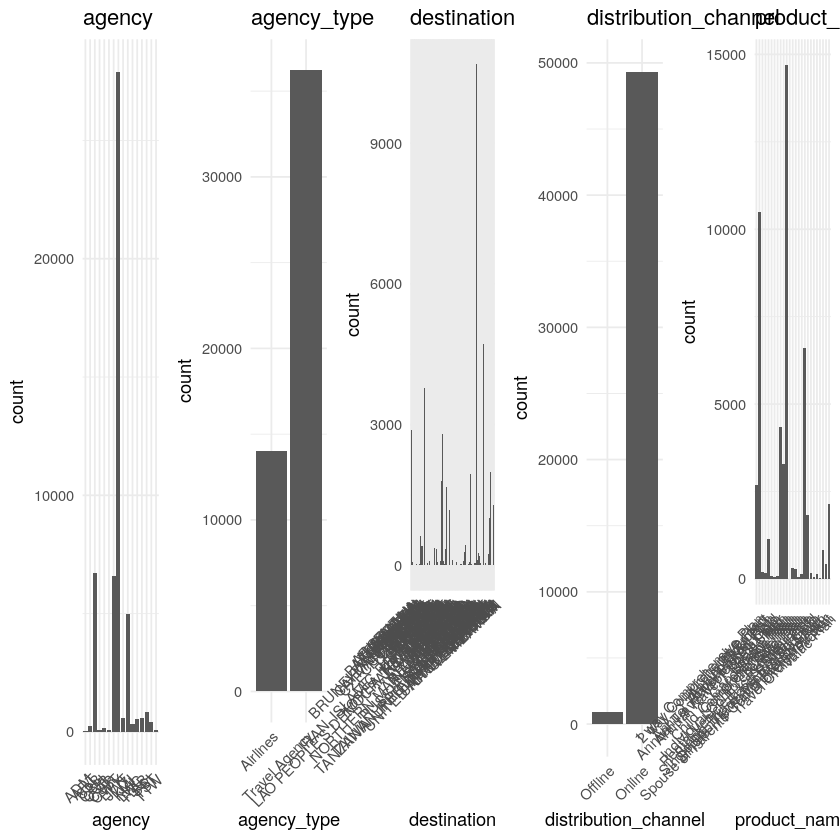

In [25]:
library(ggplot2)
library(gridExtra)

# Suponiendo que `df_clean` es tu DataFrame en R
plots <- lapply(variables_categoricas, function(column) {
  ggplot(df_clean, aes_string(x = column)) +
    geom_bar() +
    ggtitle(column) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
})

# Usar grid.arrange para mostrar múltiples gráficos
do.call(grid.arrange, c(plots, ncol = length(variables_categoricas)))


Se observa que agency_type preferida es agencia de viajes, se prefiere canal de distribusión online. Para el resto de variables se explorará a detalle


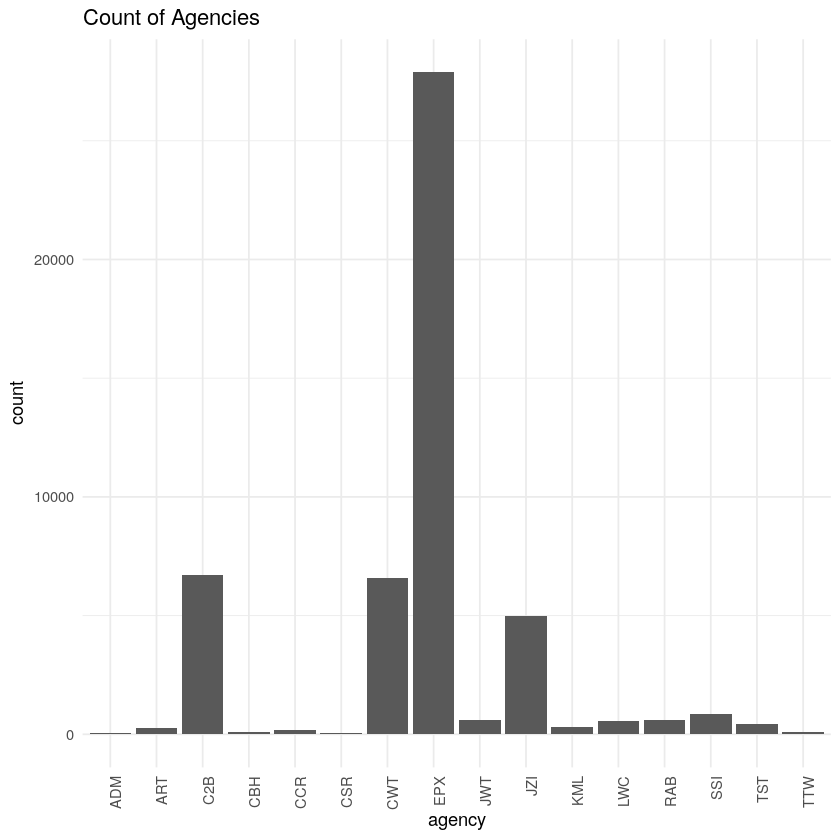

In [26]:

# Suponiendo que df_clean es tu DataFrame en R
ggplot(df_clean, aes(x = agency)) +
  geom_bar() +
  ggtitle("Count of Agencies") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


agencia con mayor numero de reclamos EPX